In [36]:
#библиотека для работ с таблицами
import pandas as pd

#загружаем датасет
df = pd.read_csv('summer_camp_data.csv')
df.head()

,date,source,medium,delivery_available,device_type,promo_activated,filter_used,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
0,2020-05-11,google,organic,Не определено,Десктоп,no,no,3120,1233,5240,1048,525,90,86649.0
1,2020-05-11,yandex,cpc,Не определено,Мобайл,yes,no,3302,544,9930,1984,1416,217,244478.0
2,2020-05-11,google,cpc,Не определено,Мобайл,no,no,2970,1450,5460,1090,599,100,105150.0
3,2020-05-11,google,cpc,Не определено,Десктоп,no,no,1875,854,4250,848,407,71,79003.0
4,2020-05-11,yandex,organic,Не определено,Десктоп,no,no,2159,1000,4110,824,351,62,61861.0


In [37]:
#выведем информацию о данных
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52721 entries, 0 to 52720
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                52721 non-null  object 
 1   source              52721 non-null  object 
 2   medium              52721 non-null  object 
 3   delivery_available  52721 non-null  object 
 4   device_type         52721 non-null  object 
 5   promo_activated     52721 non-null  object 
 6   filter_used         52721 non-null  object 
 7   pageviews           52721 non-null  int64  
 8   visits              52721 non-null  int64  
 9   productClick        52721 non-null  int64  
 10  addToCart           52721 non-null  int64  
 11  checkout            52721 non-null  int64  
 12  transactions        52721 non-null  int64  
 13  revenue             52721 non-null  float64
dtypes: float64(1), int64(6), object(7)
memory usage: 5.6+ MB


In [38]:
#сразу переведём дату в формат дататайм
df['date'] = pd.to_datetime(df['date'])

## a. Какой рекламный канал принёс больше всего дохода за всё время? 

In [39]:
#сгруппируем данные по каналам, просуммируем доход и отсортируем по возрастанию
df.groupby(by='source').sum().sort_values(by='revenue')

,pageviews,visits,productClick,addToCart,checkout,transactions,revenue
source,,,,,,,
youtube,385,326,250,50,6,0,0.000000e+00
baidu,49,36,0,0,0,0,0.000000e+00
exponea,218,68,350,70,126,5,8.804000e+03
sailplay,227,73,470,94,65,10,1.294100e+04
yandex_direct,4675,1690,2890,576,244,10,1.296000e+04
instagram,6772,4483,2840,568,491,13,1.527800e+04
facebook,43518,26981,63860,12770,6826,283,2.940910e+05
opmcpa,5085,1467,10920,2186,1449,350,3.938250e+05
mytarget,13053,2250,19900,3980,3163,318,4.136530e+05


### Видим, что наибольший доход принёс yandex (467299300, наверное рублей :))

## b. Как изменился средний чек транзакции после введения коронавирусных ограничений? Как он изменился для пользователей, покупающих с промокодом и без? (параметр «promo_activated»)

In [40]:
#посмотрим за какой период прдставлены данные
df['date'].describe()

C:\Users\ds129\AppData\Local\Temp\ipykernel_9068\1205077748.py:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  df['date'].describe()


count                   52721
unique                    274
top       2020-09-18 00:00:00
freq                      234
first     2020-01-01 00:00:00
last      2020-09-30 00:00:00
Name: date, dtype: object

Данные представлены с 1 января по 30 сентебря 2020 года. Будем считать, что короновирусные ограничения ввелись с 1 апреля(????).

In [41]:
# введём новый параметр - цена транзакции (price) как отношение дохода к числу транзакий 
df['price'] = df['revenue']/df['transactions']

In [42]:
#выведем средний чек транзакции за период до первого апреля и после
print('Средний чек до ковида: {}'.format(df[df['date'] < '2020-04-01']['price'].mean()))
print('Средний чек после ковида: {}'.format(df[df['date'] > '2020-04-01']['price'].mean()))

Средний чек до ковида: 1282.258242935994
Средний чек после ковида: 1190.756660801672


### Средний чек после ограничений снизился примерно на 7%

In [43]:
#теперь посмотрим как чек изменился для пользователей с промокодом и без него
print('Средний чек до ковида с промокодом: {}'.format(df[(df['promo_activated'] == 'yes') & 
                                                         (df['date'] < '2020-04-01')]['price'].mean()
                                                      ))

print('Средний чек до ковида без промокода: {}'.format(df[(df['promo_activated'] == 'no') & 
                                                         (df['date'] < '2020-04-01')]['price'].mean()
                                                      )) 
print('\n')
print('Средний чек после ковида с промокодом: {}'.format(df[(df['promo_activated'] == 'yes') & 
                                                         (df['date'] > '2020-04-01')]['price'].mean()
                                                      ))
print('Средний чек после ковида без промокода: {}'.format(df[(df['promo_activated'] == 'no') & 
                                                         (df['date'] > '2020-04-01')]['price'].mean()
                                                      ))     

Средний чек до ковида с промокодом: 1249.6955991545174
Средний чек до ковида без промокода: 1315.4800712443177


Средний чек после ковида с промокодом: 1213.700476940419
Средний чек после ковида без промокода: 1166.2782812699575


### Средний чек с промокодом снизился на 2.88% , а средний чек без промокода снизился на 11.34%.


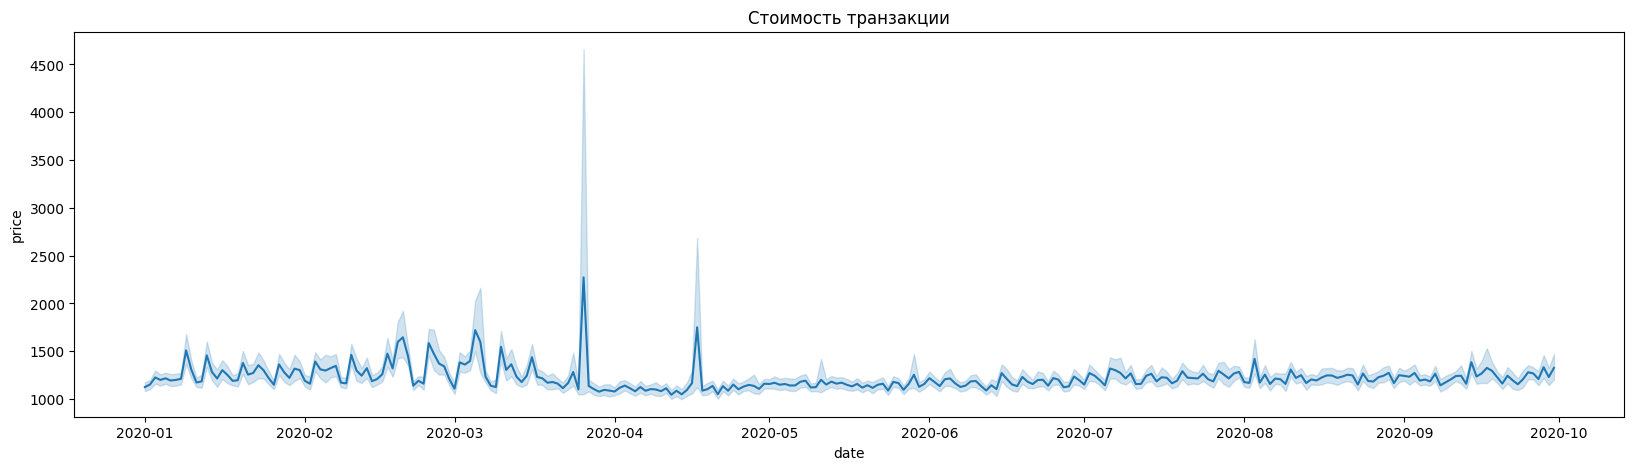

In [44]:
#Выведем для наглядности временой ряд стоимости транзакицй 
import matplotlib.pyplot as plt 
import seaborn as sns 

fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(
    data=df,
    x="date",
    y="price"
    )
ax.set_title('Стоимость транзакции');

На графике видно как среднее значение цены снижается во второй половине весны.

## c. Можно ли с уверенностью в 95% сказать, что CR (коэффициент конверсии в транзакцию) в выходные дни отличается от CR в будние дни?

In [45]:
# добавим параметр дня недели (day_of_week)
df['day_of_week'] = pd.to_datetime(df['date']).dt.day_name()

Конверсию будем считать как отношение кол-ва транзакций (transactions) к кол-ву посещений (visits)

In [46]:
# добавим параметр конверсии (CR)
df['CR'] = df['transactions']/df['visits']

In [47]:
# сгруппируем данные по дням
df.groupby(by='day_of_week').mean().sort_values(by='CR')

,pageviews,visits,productClick,addToCart,checkout,transactions,revenue,price,CR
day_of_week,,,,,,,,,
Monday,383.159131,115.282065,779.864773,155.836088,123.269089,16.559896,21215.859992,1257.142215,0.366859
Tuesday,391.277747,113.989094,767.596632,153.381281,124.527333,16.542932,20483.619858,1223.776030,0.368051
Wednesday,382.707149,112.666260,764.587057,152.764148,123.415245,16.685486,20139.957623,1208.996624,0.372341
Thursday,409.131554,119.178371,834.436687,166.740862,130.085010,17.921971,22341.402601,1272.086821,0.376820
Sunday,476.457687,132.929698,928.111695,185.452825,160.901445,22.197766,25153.637582,1153.257413,0.394697
Friday,530.464688,147.844227,1087.853744,217.330078,176.518783,24.534560,30017.256198,1252.601572,0.395565
Saturday,530.755496,144.515313,1041.856653,208.130639,181.240310,25.274876,29050.364595,1175.834462,0.405397


Видно, что конверсия в пятницу, субботу и воскресенье немного больше, чем в остальные дни. Выдвинем гипотезы и проведём А/В тестирование:

In [48]:
# добавим параметр типа дня(выходной или будни)
weekend_list = ['Sunday','Saturday']
df['type_of_day'] = df['day_of_week'].apply(lambda x: 'Выходной' if x in weekend_list else 'Будни')

In [49]:
#импортируем библиотеку для статистического теста
from statsmodels.stats.proportion import proportions_ztest

#выдвигаем гипотезы
H0 = 'Конверсии в группах А и B равны'
H1 = 'Конверсия в группе А больше чем конверсия в группе B'

#задаём 95% точность
alpha = 0.05

#проводим z-тест
_, p_value = proportions_ztest(
    count=df.groupby('type_of_day')['transactions'].mean(), 
    nobs=df.groupby('type_of_day')['visits'].mean(),
    alternative='larger')

print(round(p_value, 2))

if (p_value < alpha): 
    print(f"Отвергаем нулевую гипотезу. {H0}")
    print(f"Альтернативная гипотеза. H1: {H1}")
else:
    print(f"Принимаем нулевую гипотезу. {H0}")

0.66
Принимаем нулевую гипотезу. Конверсии в группах А и B равны


### Не смотря на то, что визуально конверсия в выходные действительно отличается, статестический тест с 95% точностью говорит нам о том что разницы в конверсии нет.

## d. Вам необходимо спрогнозировать объем дохода, полученного с пользователей,приведенных на сайт контекстной рекламой (medium = cpc) на полгода вперед. 

In [50]:
#создадим датафрейм куда входит только суммарная прибыль по дням
data = df[df['medium'] == 'cpc']
data = pd.DataFrame({'date':df['date'], 'revenue': df['revenue']})
data = data.groupby(by='date').sum()

<AxesSubplot:xlabel='date'>

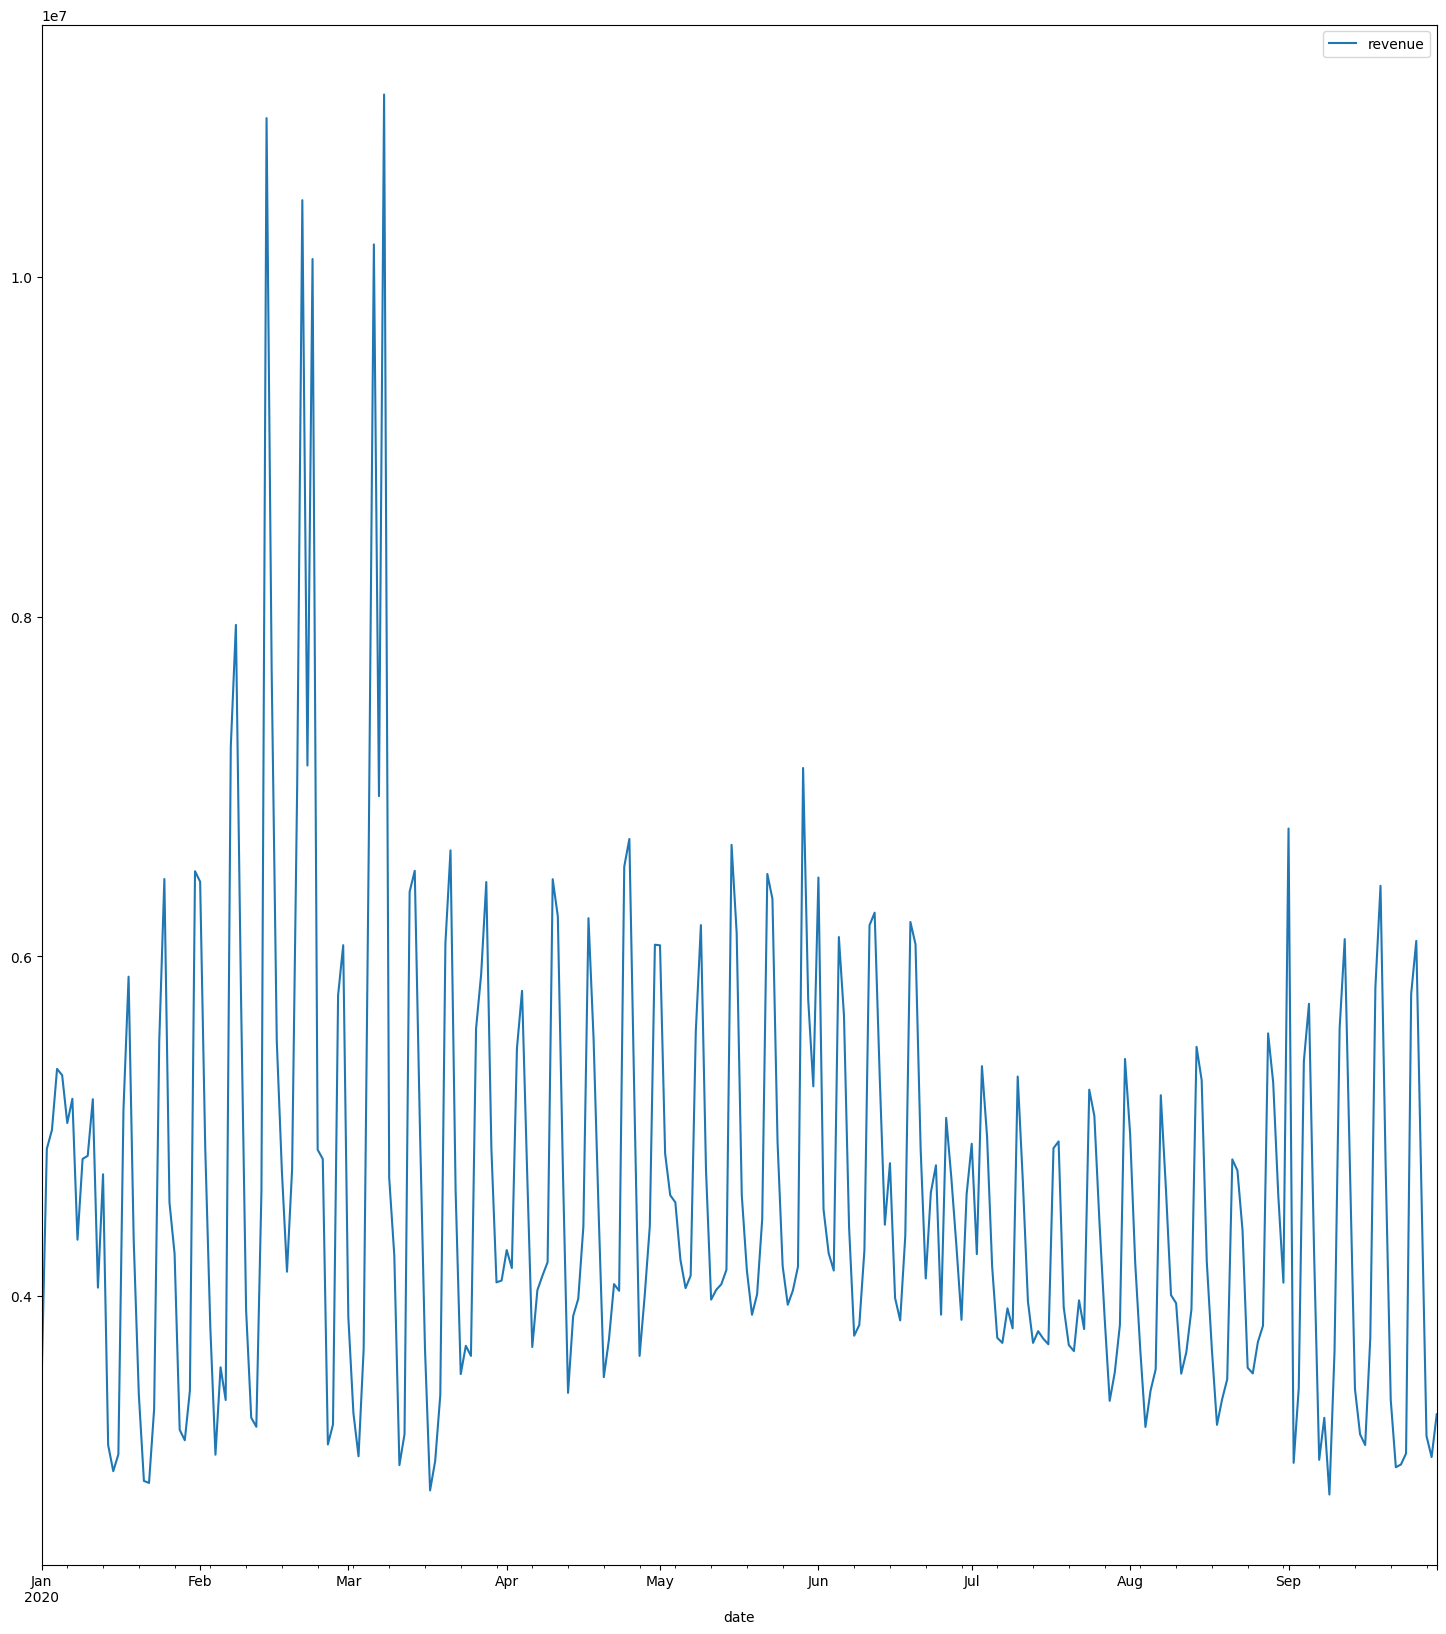

In [51]:
#отобразим временной ряд
data.plot()

Выделим тренд, сезонность и шумы:

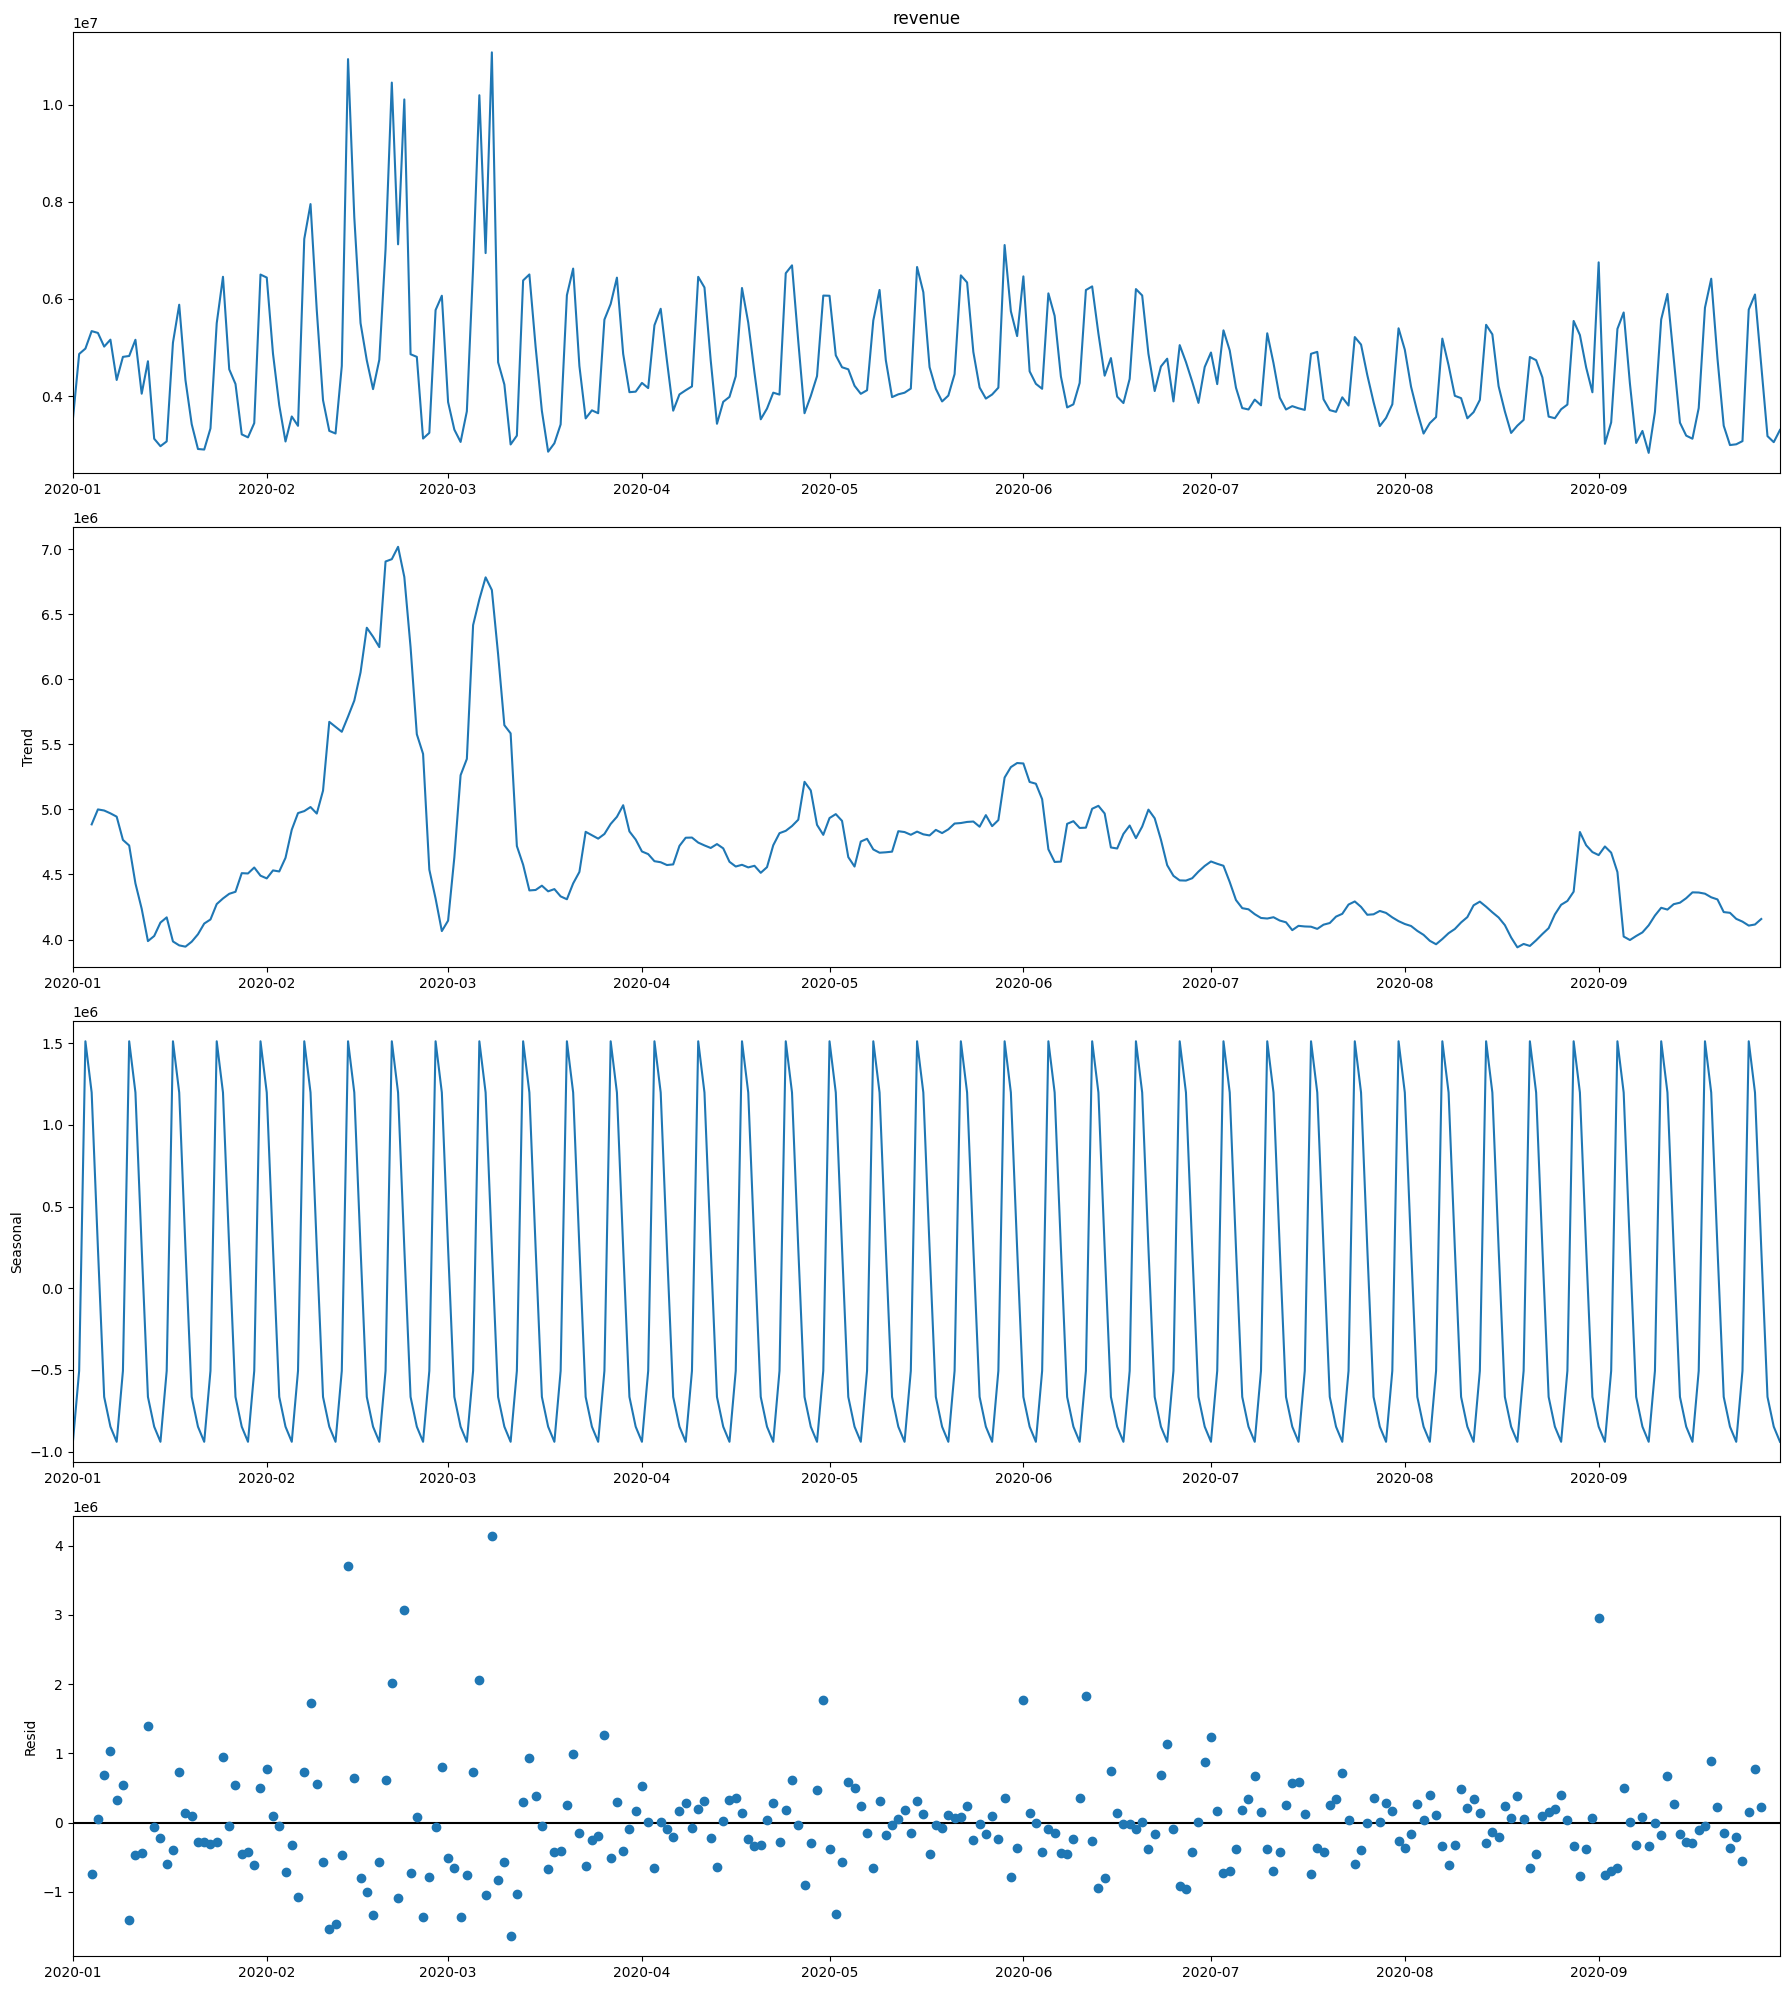

In [52]:
#загружаем библиотеку для декомпозиции временного ряда
from statsmodels.tsa.seasonal import seasonal_decompose

plt.rcParams["figure.figsize"] = 18, 20

result = seasonal_decompose(data['revenue'], model='additive')
result.plot()
plt.show()

Виден нелинейный тренд, явная сезонность и наличие шумов.

Взглянем на сезонность подробнее:

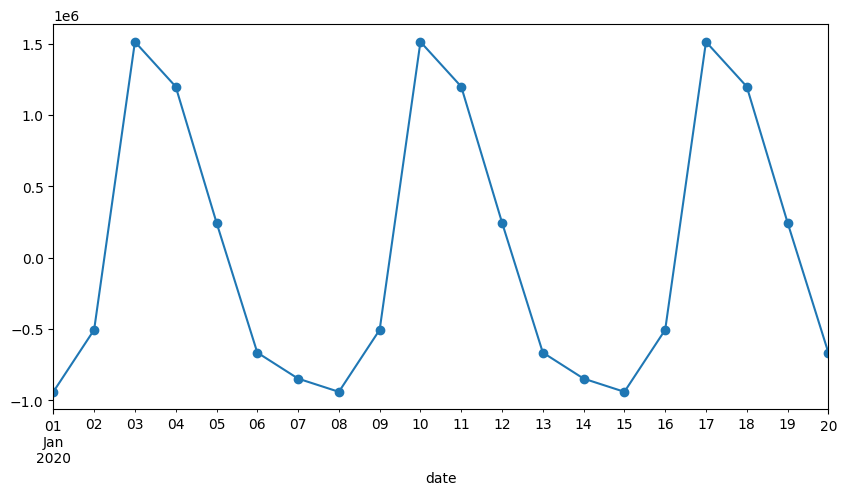

In [53]:
plt.rcParams["figure.figsize"] = 10, 5
result.seasonal[:20].plot(marker="o")
plt.show()

Период повторения = 7, скорее всего по дням недели.

Проверим ряд на стационарность тестом Дики-Фуллера:

In [54]:
#загружаем библиотеку для теста 
from statsmodels.tsa.stattools import adfuller

#напишем функцию для проверки на стационарность
def stat_test(df):
    test = adfuller(df)
    print ('adf: ', test[0] )
    print ('p-value: ', test[1])
    print('Critical values: ', test[4])
    if test[0]> test[4]['5%']: 
        print ('есть единичные корни, ряд не стационарен')
    else:
        print ('единичных корней нет, ряд стационарен')

#применем функцию к ряду
stat_test(data['revenue'])

adf:  -2.0982296159092177
p-value:  0.2452270775049431
Critical values:  {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}
есть единичные корни, ряд не стационарен


Сделаем дифференцирование первого порядка и проверим ряд на стационарность:

In [55]:
#производная первого порядка
stat_test(data['revenue'].diff(1).dropna())

adf:  -8.14050066340302
p-value:  1.0312698723080455e-12
Critical values:  {'1%': -3.4558530692911504, '5%': -2.872764881778665, '10%': -2.572751643088207}
единичных корней нет, ряд стационарен


Теперь ряд стационарен, так как хватило первого порядка производной в дальнейшем параметр d = 1(Порядок изменения тренда).

Построим график автокорреляции:

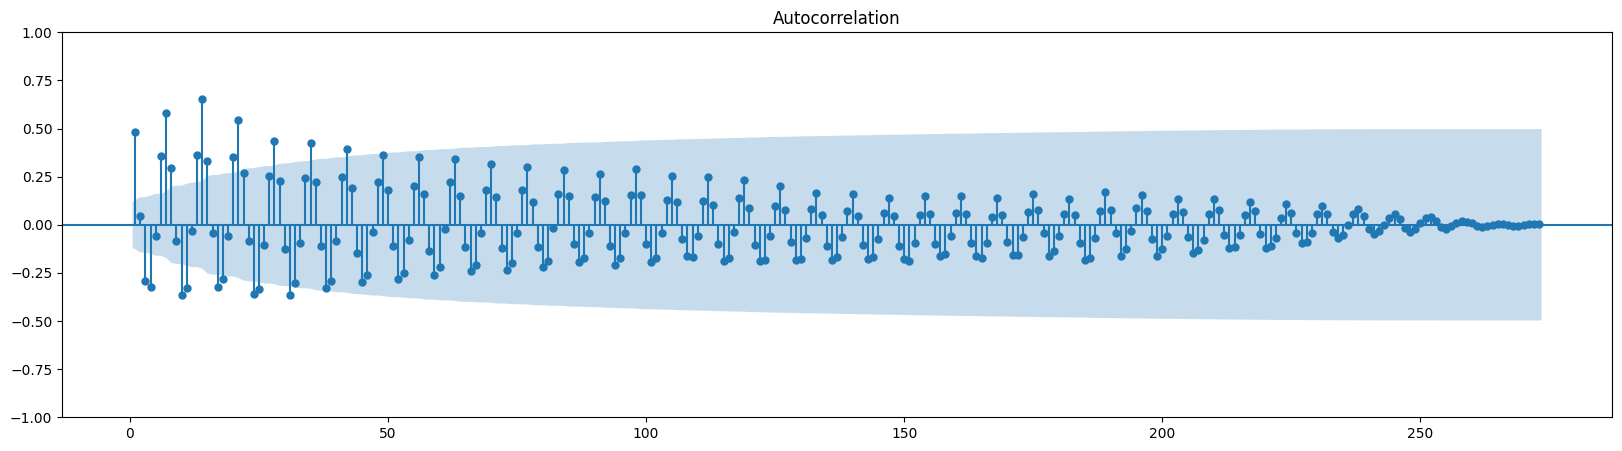

In [56]:
import statsmodels.graphics.tsaplots as sgt
plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_acf(data['revenue'], zero = False, lags = 273)
plt.show()

Построим график частичной корреляции и по лагам выберем значение p(Порядок авторегрессии тренда):

d:\python 3.9.10\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


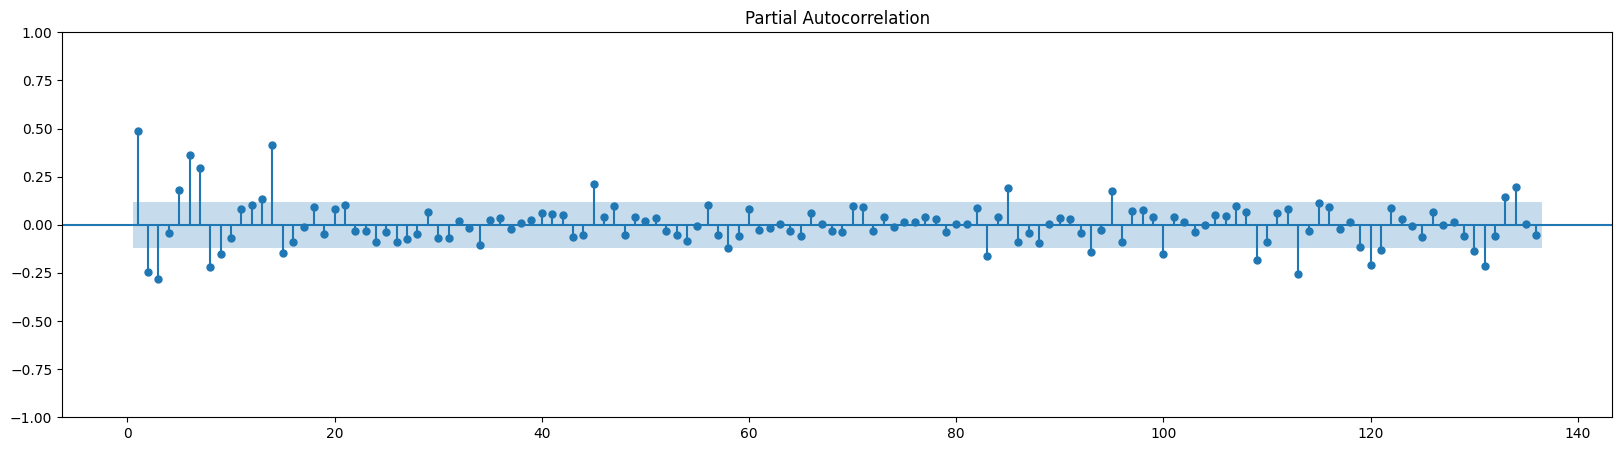

In [57]:
import statsmodels.graphics.tsaplots as sgt
plt.rcParams["figure.figsize"] = 20, 5
sgt.plot_pacf(data['revenue'], zero = False, lags = 136)
plt.show()

Сильно выделяется 5-ый лаг, p = 5.

Для построения прогноза будем пользоваться моделью SARIMAX - авторегрессионное интегрированное скользящее среднее с выраженной сезонностью:

In [58]:
#импортируем модель 
from statsmodels.tsa.statespace.sarimax import SARIMAX

#задаём найденные параметры
seas_model = SARIMAX(
    data["revenue"].dropna(), order=(5, 1, 1), seasonal_order=(5, 1, 1, 7)
)

#обучаем модель
seas_model_fit = seas_model.fit()

d:\python 3.9.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
d:\python 3.9.10\lib\site-packages\statsmodels\tsa\base\tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [59]:
#создадим датафрейм для прогноза на пол года вперёд(до 30 марта 2021)
pred_df = pd.DataFrame(index = pd.date_range(start='2020-01-01',end='2021-03-30'))
#предсказываем значения начиная с 2020-04-30 для того чтобы сравнить с известными значениями
pred_df["model_preds"] = seas_model_fit.predict(start = '2020-04-30', end = '2021-03-30')
pred_df["revenue"] = data["revenue"]

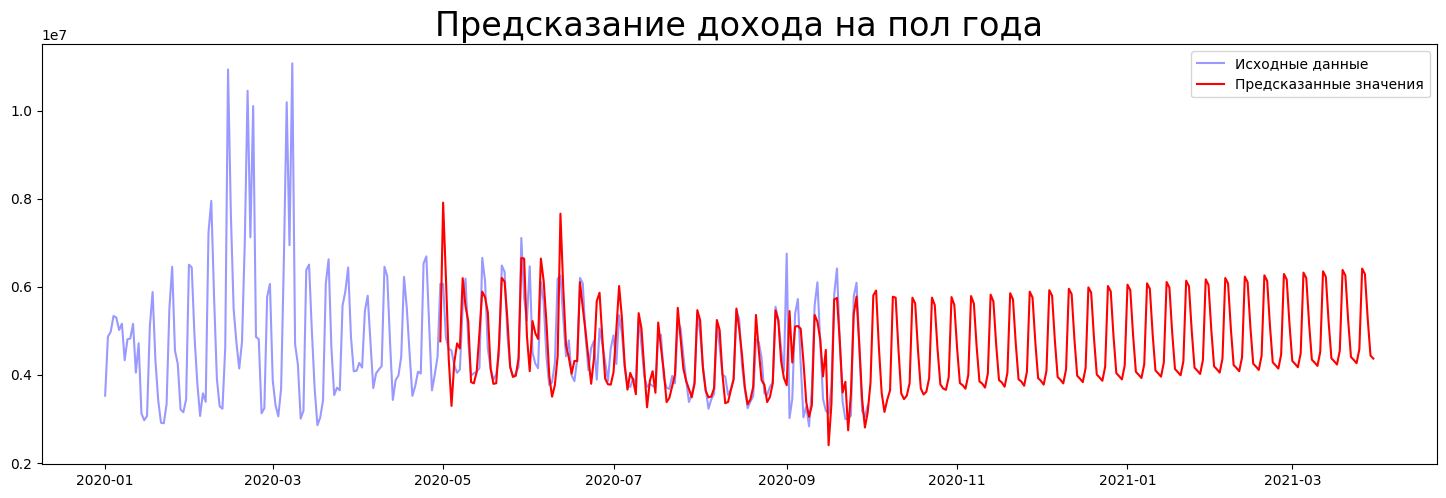

In [60]:
#визуализируем предсказание 
plt.rcParams["figure.figsize"] = 18, 12
plt.subplot(2, 1, 1)
plt.plot(pred_df["revenue"], color = "blue", label = "Исходные данные", alpha = 0.4)
plt.plot(pred_df.loc[pred_df.index]["model_preds"], color = "red", linestyle = "-", label = "Предсказанные значения")
plt.title("Предсказание дохода на пол года", size = 24)
plt.legend()
plt.show()

### Синем цветом показан исходный временной ряд, а красным предсказанный. Там где графики пересекаются видно, что предсказанные значения уловили тренд и сезонность временного ряда. Так же видим предсказанные значения дохода после 2020-09-30 вплоть до 2021-03-30.